# RainyNuScenes - Take a look

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

### Example

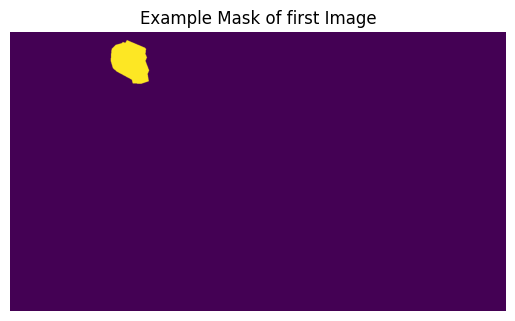

Clear: 0
Droplet: 29
Resolution: (900, 1600)


In [2]:


# Open the image file
mask_path = "/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/example/n008-2018-09-18-12-07-26-0400__CAM_BACK_LEFT__1537286923547405_jpg.rf.16f9985c1919463b227882120a61ef84_mask.png"  # Replace with your image file path
mask_img = Image.open(mask_path).convert("L")  # Convert to grayscale


# Open the image file
image_path = "/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/example/n008-2018-09-18-12-07-26-0400__CAM_BACK_LEFT__1537286923547405_jpg.rf.16f9985c1919463b227882120a61ef84.jpg"  # Replace with your image file path
image_img = Image.open(image_path)


# Convert the image to a NumPy array
image = np.array(image_img)
mask = np.array(mask_img)

# Plot the image
plt.imshow(mask)
plt.axis('off')  # Hide axis for better visualization
plt.title("Example Mask of first Image")
plt.show()

print("Clear:", np.min(mask))
print("Droplet:", np.max(mask))
print("Resolution:", mask.shape)


#### Preprocess Function

Binarization

In [3]:
def binarize_array(array):
    """
    Binarizes a 2D numpy array such that all values > 1 become 1 and values <= 1 stay 0.

    Parameters:
    array (numpy.ndarray): A 2D numpy array to be binarized.

    Returns:
    numpy.ndarray: The binarized 2D numpy array.
    """
    if not isinstance(array, np.ndarray):
        raise ValueError("Input must be a numpy array")
    if len(array.shape) != 2:
        raise ValueError("Input array must be 2D")

    binarized = np.where(array > 1, 1, 0)
    return binarized

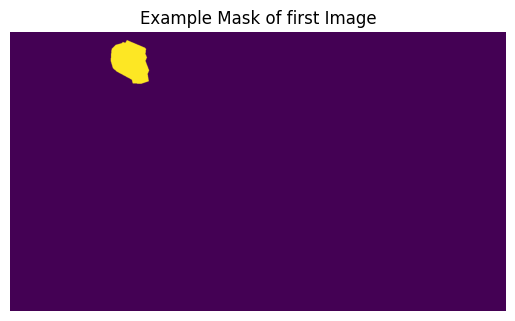

Clear: 0
Droplet: 1
Resolution: (900, 1600)


In [4]:
mask = binarize_array(mask)

# Plot the image
plt.imshow(mask)
plt.axis('off')  # Hide axis for better visualization
plt.title("Example Mask of first Image")
plt.show()

print("Clear:", np.min(mask))
print("Droplet:", np.max(mask))
print("Resolution:", mask.shape)

Resize

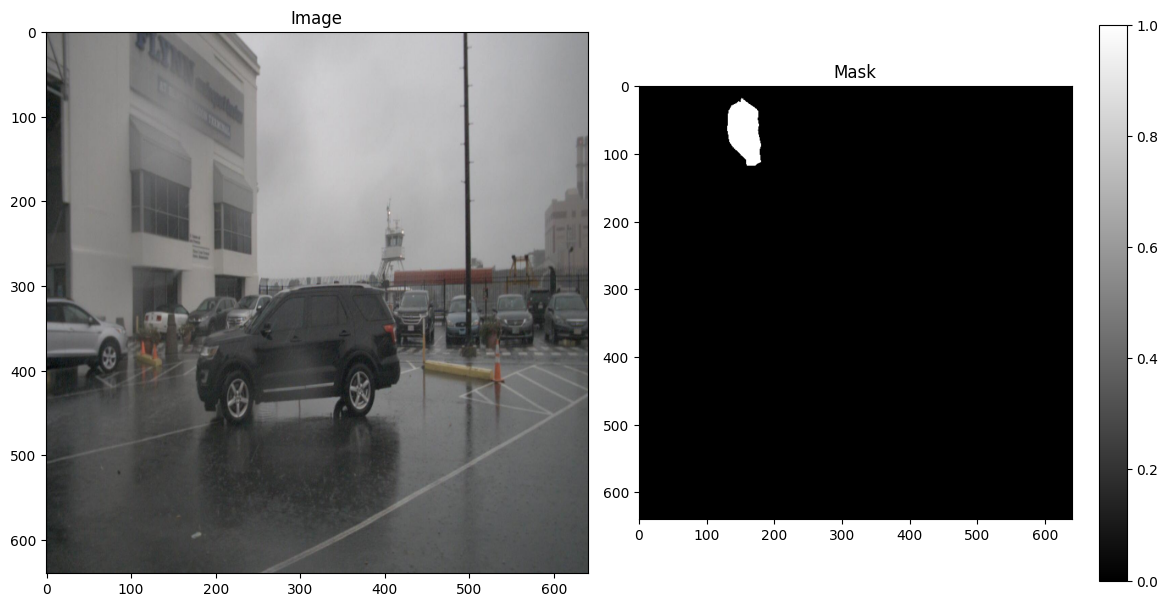

Mask Resolution: (640, 640)
Image Resolution: (640, 640, 3)


In [5]:


def resize_data(data: np.ndarray, target_size: tuple = (640, 640)) -> np.ndarray:
    """
    Resize a numpy array (either a grayscale or an RGB image) to the target size.

    Args:
        data (np.ndarray): Input numpy array representing the grayscale or RGB image.
        target_size (tuple): Target resolution as (width, height). Default is (640, 640).

    Returns:
        np.ndarray: The resized numpy array.
    """
    if len(data.shape) == 2:
        # Grayscale image
        resized_data = cv2.resize(data, target_size, interpolation=cv2.INTER_NEAREST)
    elif len(data.shape) == 3 and data.shape[2] == 3:
        # RGB image
        resized_data = cv2.resize(data, target_size, interpolation=cv2.INTER_LINEAR)
    else:
        raise ValueError("Input data must be a 2D grayscale or a 3D RGB image with 3 channels.")
    
    return resized_data

mask = resize_data(mask)
image = resize_data(image)


# Create a Matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first array as an RGB image
axes[0].imshow(image)
axes[0].set_title("Image")

# Plot the second array as a grayscale image
im2 = axes[1].imshow(mask, cmap='gray')
axes[1].set_title("Mask")
fig.colorbar(im2, ax=axes[1], orientation='vertical')

# Add some padding and show the plot
plt.tight_layout()
plt.show()

print("Mask Resolution:", mask.shape)
print("Image Resolution:", image.shape)

### WoodScape  Example

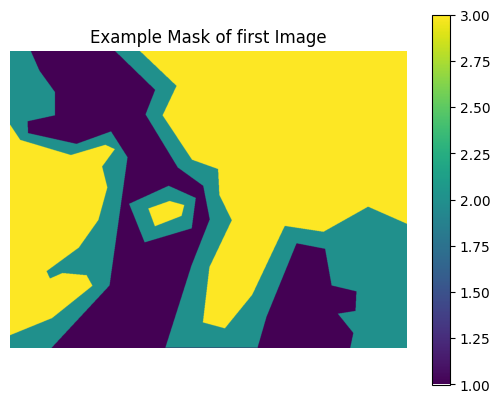

Clear: 1
Droplet: 3
Resolution: (960, 1280)


In [6]:


# Open the image file
mask_path = "/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/example/mask_0031_FV.png"  # Replace with your image file path
mask_img = Image.open(mask_path).convert("L")  # Convert to grayscale


# Open the image file
image_path = "/home/tim/Documents/06_Projekt_RainyNuScenes/rainynuscenes/example/img_0031_FV.png"  # Replace with your image file path
image_img = Image.open(image_path)


# Convert the image to a NumPy array
image = np.array(image_img)
mask = np.array(mask_img)

# Plot the image
plt.imshow(mask)
plt.axis('off')  # Hide axis for better visualization
plt.title("Example Mask of first Image")
plt.colorbar()
plt.show()

print("Clear:", np.min(mask))
print("Droplet:", np.max(mask))
print("Resolution:", mask.shape)


Binarization

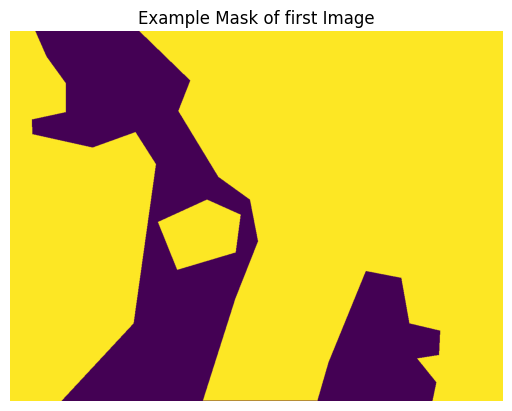

Clear: 0
Droplet: 1
Resolution: (960, 1280)


In [7]:
mask = binarize_array(mask)

# Plot the image
plt.imshow(mask)
plt.axis('off')  # Hide axis for better visualization
plt.title("Example Mask of first Image")
plt.show()

print("Clear:", np.min(mask))
print("Droplet:", np.max(mask))
print("Resolution:", mask.shape)

Resizing

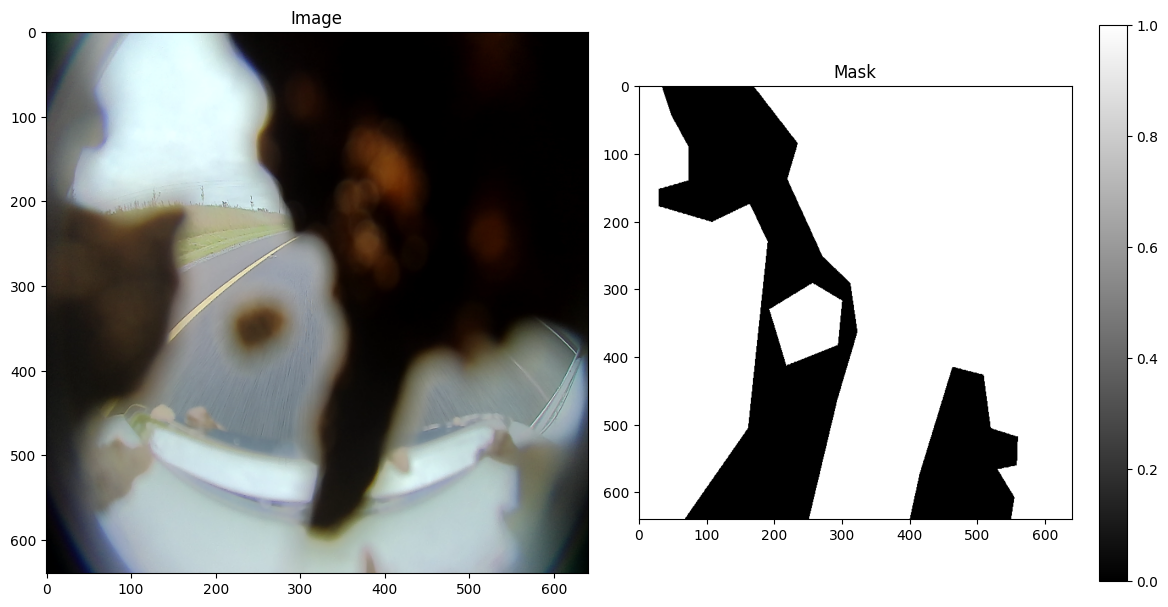

Mask Resolution: (640, 640)
Image Resolution: (640, 640, 3)


In [8]:
mask = resize_data(mask)
image = resize_data(image)



# Create a Matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first array as an RGB image
axes[0].imshow(image)
axes[0].set_title("Image")

# Plot the second array as a grayscale image
im2 = axes[1].imshow(mask, cmap='gray')
axes[1].set_title("Mask")
fig.colorbar(im2, ax=axes[1], orientation='vertical')

# Add some padding and show the plot
plt.tight_layout()
plt.show()

print("Mask Resolution:", mask.shape)
print("Image Resolution:", image.shape)